In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings("ignore")

# 对实验3的数据集进行预处理

df1 = pd.read_csv('3_data.csv',encoding='utf-8')

df1 = df1.dropna()

df1 = df1.reset_index(drop=True)

df1 = df1.drop('id', axis=1)

df1['diagnosis'] = df1['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)#.apply()方法将函数应用于指定位置的每个元素

# Split data
X = df1.drop('diagnosis', axis=1)
le = LabelEncoder()
y = le.fit_transform(df1['diagnosis'])

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Create RandomForestClassifier with 100 estimators
rfc = RandomForestClassifier(n_estimators=100, random_state=90)

# Evaluate RandomForestClassifier
score = cross_val_score(rfc, X, y, cv=10).mean()
score

0.9589285714285716

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=3000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(f"Classification Report for {name} on Validation Set:")
    print(classification_report(y_val, y_pred))
    
    # After tuning parameters on validation set, evaluate on test set
    y_pred_test = clf.predict(X_test)
    print(f"Classification Report for {name} on Test Set:")
    print(classification_report(y_test, y_pred_test))

Classification Report for Logistic Regression on Validation Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        35
           1       0.90      0.90      0.90        21

    accuracy                           0.93        56
   macro avg       0.92      0.92      0.92        56
weighted avg       0.93      0.93      0.93        56

Classification Report for Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.96      0.90      0.93        49

    accuracy                           0.94       112
   macro avg       0.94      0.93      0.94       112
weighted avg       0.94      0.94      0.94       112

Classification Report for Random Forest on Validation Set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.90      0.95        21


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Create RandomForestClassifier with 100 estimators
rfc = RandomForestClassifier(n_estimators=100, random_state=90)

# Evaluate RandomForestClassifier
score = cross_val_score(rfc, X, y, cv=10).mean()
score

0.9589285714285716

Best score for RandomForestClassifier on Validation Set: 0.9617307692307693 with n_estimators: 101


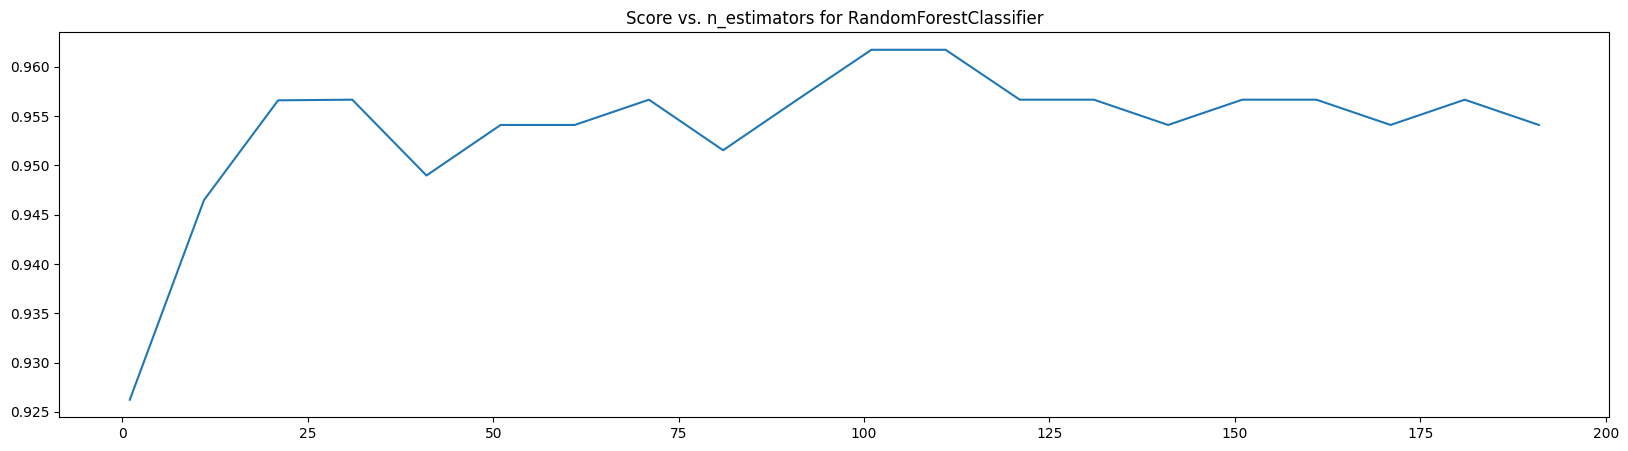

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Tuning RandomForestClassifier
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1, random_state=90)
    score = cross_val_score(rfc,X_train,y_train,cv=10).mean()
    scorel.append(score)
print("Best score for RandomForestClassifier on Validation Set:", max(scorel), "with n_estimators:", (scorel.index(max(scorel))*10)+1)

plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.title('Score vs. n_estimators for RandomForestClassifier')
plt.show()

In [11]:
# After tuning parameters on validation set, evaluate on test set with best n_estimators
rfc_best = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=90)
rfc_best.fit(X_train, y_train)
y_pred_test = rfc_best.predict(X_test)
print("Classification Report for RandomForestClassifier on Test Set:")
print(classification_report(y_test, y_pred_test))

Classification Report for RandomForestClassifier on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.96      0.92      0.94        49

    accuracy                           0.95       112
   macro avg       0.95      0.94      0.95       112
weighted avg       0.95      0.95      0.95       112



In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 对实验4的数据集进行预处理
df = pd.read_csv('4_data.csv')

df = df.dropna()

df = df.drop('id', axis=1)

replace_values1 = {'14-Oct': '10-14', '9-May': '5-9'}
df['tumor-size'] = df['tumor-size'].replace(replace_values1)

replace_values2 = {'5-Mar': '3-5', '8-Jun': '6-8', '11-Sep': '9-11', '14-Dec': '12-14'}
df['inv-nodes'] = df['inv-nodes'].replace(replace_values2)

excel = pd.read_excel('4_variables.xlsx', index_col=0)
temp1_variables = excel['Description'].tolist()
temp2_variables = [item.split(', ') for item in temp1_variables]
variables = []
for item in temp2_variables:
    for sublist in item:
        variables.append(sublist)

for column in df.columns[1:]:
    if column == 'irradiat':
        for i in df.index:
            first_index = variables.index(df.loc[i, column])
            second_index = variables[first_index+1:].index(df.loc[i, column]) + first_index + 1
            df.loc[i, column] = second_index
    else:
        for i in df.index:
            df.loc[i, column] = variables.index(str(df.loc[i, column]))
            
ind2val = {}

for attribute, row in excel.iterrows():
    if attribute != 'irradiat':
        for item in row['Description'].split(', '):
            index = variables.index(item)
            ind2val[index] = f"{attribute}={item}"
    else:
        for item in row['Description'].split(', '):
            first_index = variables.index(item)
            second_index = variables[first_index+1:].index(item) + first_index + 1
            index = second_index
            ind2val[index] = f"{attribute}={item}"

# print(df)

X = df.drop('Class', axis=1)
le = LabelEncoder()
y = le.fit_transform(df['Class'])

In [48]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
}

# 使用k折交叉验证法划分训练集/测试集（可调整随机种子以获得不同的划分方案）
# Define k-fold cross validation
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Perform k-fold cross validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train and evaluate classifiers
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Classification Report for {name} on Test Set:")
        print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.73      0.95      0.82        37
           1       0.75      0.32      0.44        19

    accuracy                           0.73        56
   macro avg       0.74      0.63      0.63        56
weighted avg       0.74      0.73      0.69        56

Classification Report for Random Forest on Test Set:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        37
           1       0.47      0.37      0.41        19

    accuracy                           0.64        56
   macro avg       0.59      0.58      0.58        56
weighted avg       0.63      0.64      0.63        56

Classification Report for SVM on Test Set:
              precision    recall  f1-score   support

           0       0.66      1.00      0.80        37
           1       0.00      0.00      0.00        19

    accuracy               

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Train on the training set
    clf.fit(X_train, y_train)
    
    # Validate on the validation set
    y_val_pred = clf.predict(X_val)
    print(f"Classification Report for {name} on Validation Set:")
    print(classification_report(y_val, y_val_pred))
    
    # Test on the test set
    y_test_pred = clf.predict(X_test)
    print(f"Classification Report for {name} on Test Set:")
    print(classification_report(y_test, y_test_pred))

Classification Report for Logistic Regression on Validation Set:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.75      0.38      0.50         8

    accuracy                           0.79        28
   macro avg       0.77      0.66      0.68        28
weighted avg       0.78      0.79      0.76        28

Classification Report for Logistic Regression on Test Set:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        36
           1       0.75      0.30      0.43        20

    accuracy                           0.71        56
   macro avg       0.73      0.62      0.62        56
weighted avg       0.72      0.71      0.67        56

Classification Report for Random Forest on Validation Set:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.67      0.50      0.57         8


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X = df[['node-caps', 'irradiat', 'inv-nodes']]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Train on the training set
    clf.fit(X_train, y_train)
    
    # Validate on the validation set
    y_val_pred = clf.predict(X_val)
    print(f"Classification Report for {name} on Validation Set:")
    print(classification_report(y_val, y_val_pred))
    
    # Test on the test set
    y_test_pred = clf.predict(X_test)
    print(f"Classification Report for {name} on Test Set:")
    print(classification_report(y_test, y_test_pred))

NameError: name 'df' is not defined